GMM Silhouette Score: 0.15968887245939664
KMeans Silhouette Score: 0.17511353215805028
GMM Adjusted Rand Index: 0.3383716843163693
KMeans Adjusted Rand Index: 0.3935592799465574


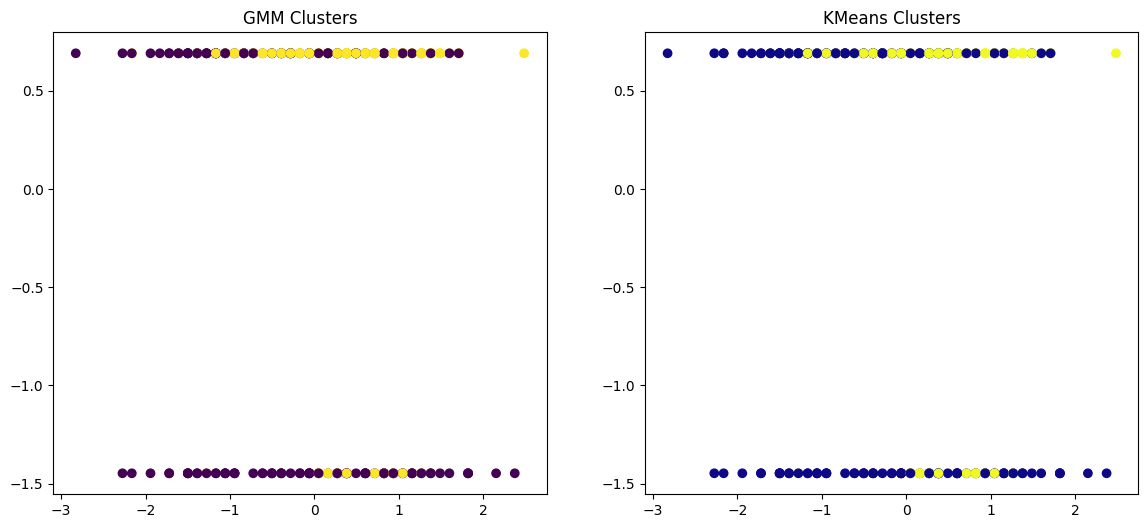

In [1]:
############EXERCISE-11######################
#****************WITH GRAPH****************************
# Apply EM algorithm to cluster a Heart Disease Data Set. Use the same data set
# for clustering using k-Means algorithm. Compare the results of these two
# algorithms and comment on the quality of clustering. You can add Java/Python
# ML library classes/API in the program.
# ------------------------------------------------------------------------------------------
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, na_values="?").dropna()
X = data.drop("target", axis=1)
y = data["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
kmeans_labels = kmeans.fit_predict(X_scaled)

gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_ari = adjusted_rand_score(y, gmm_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print(f"GMM Silhouette Score: {gmm_silhouette}")
print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"GMM Adjusted Rand Index: {gmm_ari}")
print(f"KMeans Adjusted Rand Index: {kmeans_ari}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clusters')
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='plasma')
plt.title('KMeans Clusters')
plt.show()